Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from models.initializers import xavier_init, random_init, he_init
from models.losses import MeanSquaredError, CrossEntropyLoss
from models.activations import ReLU, Softmax, Sigmoid
from models.network import NeuralNetwork
from models.layers import DenseLayer, FlattenLayer, ConvolutionalLayer, MaxPoolingLayer
from load_data import load_fashion_mnist, load_mnist
from utils import one_hot_encode


In [8]:
x_train, y_train, x_test, y_test = load_fashion_mnist()

x_train = x_train[:8000]
y_train = y_train[:8000]

x_train_c = x_train.reshape(-1, 1, 28, 28)
x_test_c = x_test.reshape(-1, 1, 28, 28)

autoencoder_conv = NeuralNetwork()
autoencoder_conv.add_layer(ConvolutionalLayer(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1))
autoencoder_conv.add_layer(MaxPoolingLayer(pool_size=2, stride=2))
autoencoder_conv.add_layer(ConvolutionalLayer(in_channels=4, out_channels=4, kernel_size=3, stride=1, padding=1))
autoencoder_conv.add_layer(MaxPoolingLayer(pool_size=2, stride=2))
autoencoder_conv.add_layer(FlattenLayer())
autoencoder_conv.add_layer(DenseLayer(7 * 7 * 4, 400, activation_fn=ReLU()))
autoencoder_conv.add_layer(DenseLayer(400, 784, activation_fn=Sigmoid()))

autoencoder_conv.train(x_train_c, x_train, epochs=10, batch_size=100, learning_rate=0.6, loss_function=MeanSquaredError())

Epoch: 1, Loss: 0.161
Epoch: 2, Loss: 0.086
Epoch: 3, Loss: 0.086
Epoch: 4, Loss: 0.085
Epoch: 5, Loss: 0.084
Epoch: 6, Loss: 0.059
Epoch: 7, Loss: 0.052
Epoch: 8, Loss: 0.043
Epoch: 9, Loss: 0.045
Epoch: 10, Loss: 0.038


In [15]:
print(autoencoder_conv.layers[0].outputs.shape)
print(autoencoder_conv.layers[1].outputs.shape)
print(autoencoder_conv.layers[2].outputs.shape)
print(autoencoder_conv.layers[3].outputs.shape)
print(autoencoder_conv.layers[5].outputs.shape)
print(autoencoder_conv.layers[6].outputs.shape)

(100, 4, 28, 28)
(100, 4, 14, 14)
(100, 4, 14, 14)
(100, 4, 7, 7)
(100, 400)
(100, 784)


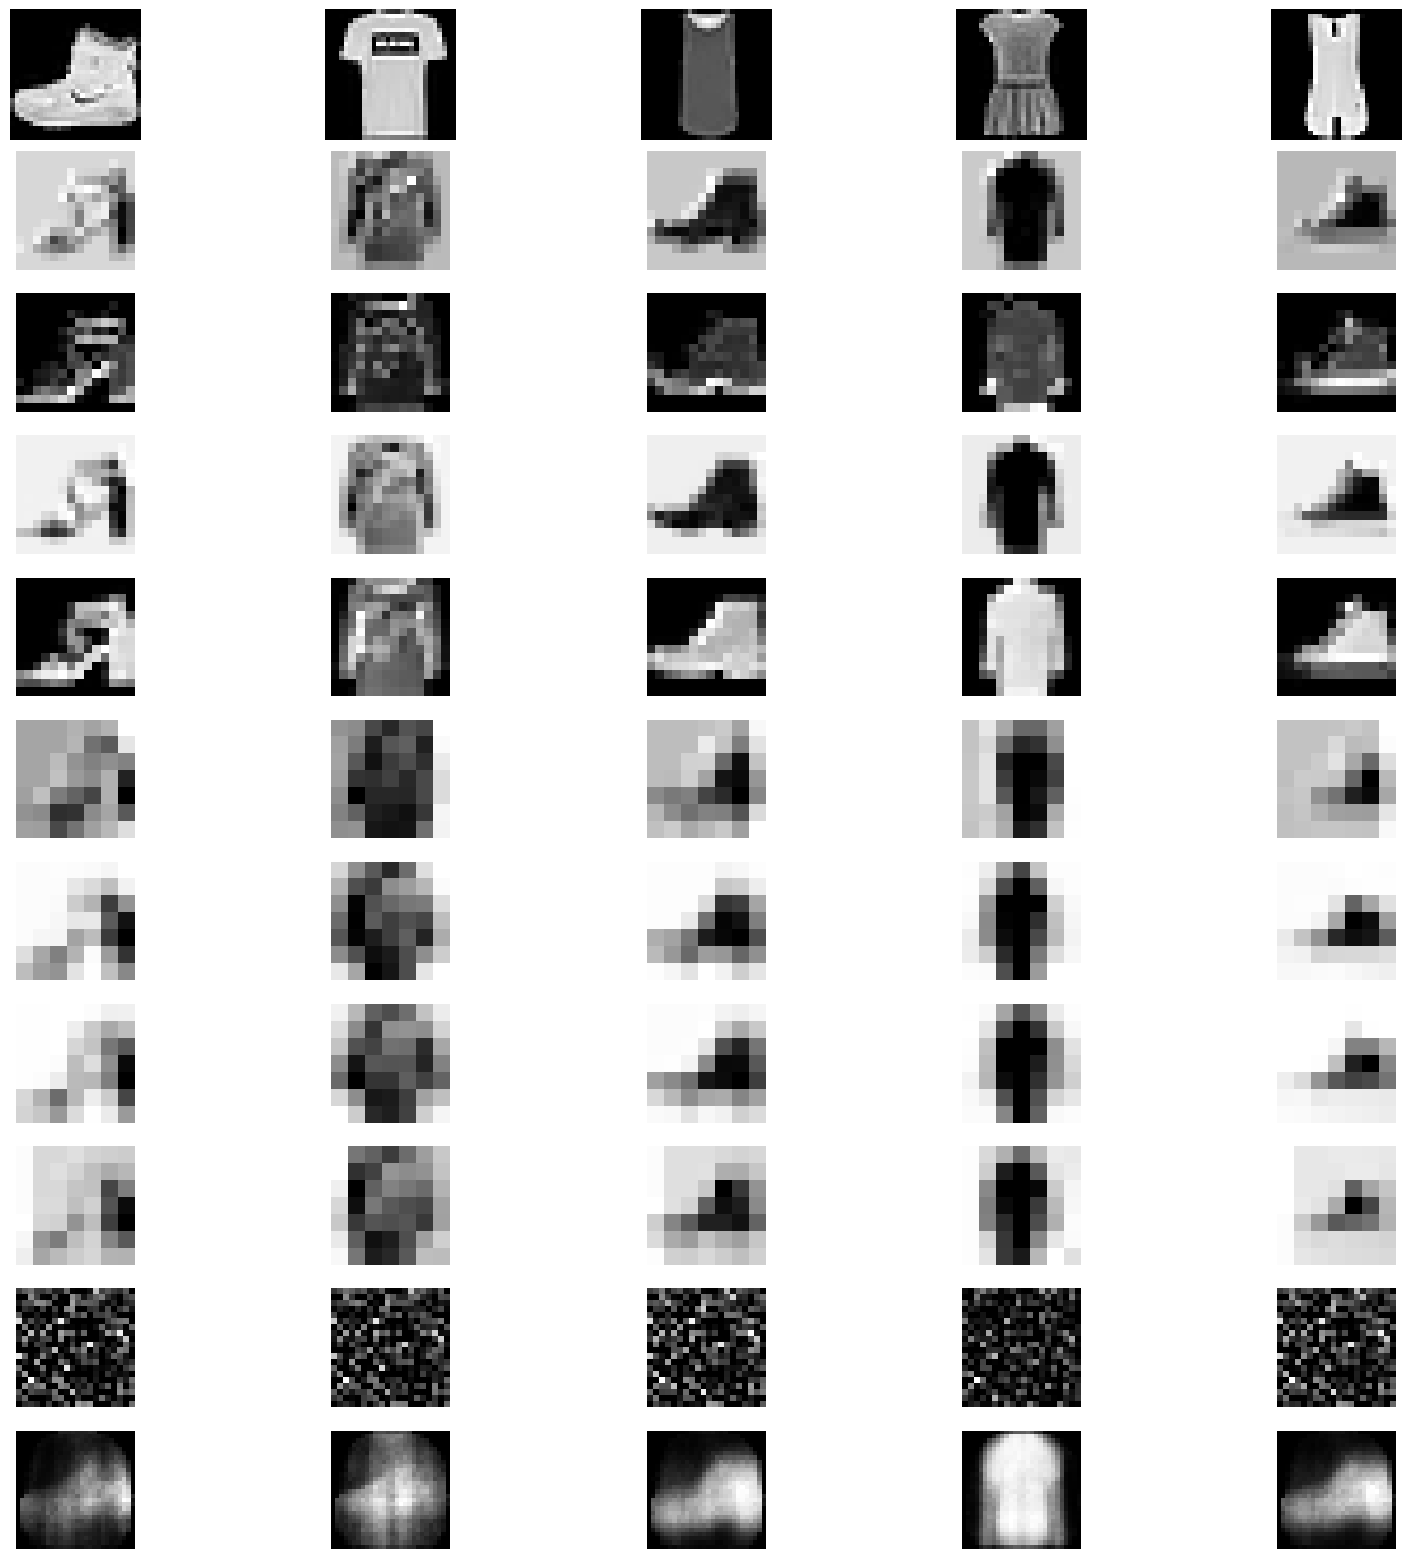

In [28]:
plt.figure(figsize=(40, 20))

for i in range(5):
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    
    plt.subplot(11, 10, i + 11)
    plt.imshow(autoencoder_conv.layers[1].outputs[i][0], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 21)
    plt.imshow(autoencoder_conv.layers[1].outputs[i][1], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 31)
    plt.imshow(autoencoder_conv.layers[1].outputs[i][2], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 41)
    plt.imshow(autoencoder_conv.layers[1].outputs[i][3], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 51)
    plt.imshow(autoencoder_conv.layers[3].outputs[i][0], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 61)
    plt.imshow(autoencoder_conv.layers[3].outputs[i][1], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 71)
    plt.imshow(autoencoder_conv.layers[3].outputs[i][2], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 81)
    plt.imshow(autoencoder_conv.layers[3].outputs[i][3], cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 91)
    plt.imshow(autoencoder_conv.layers[5].outputs[i].reshape(20, 20), cmap='gray')
    plt.axis('off')
    
    plt.subplot(11, 10, i + 101)
    plt.imshow(autoencoder_conv.layers[6].outputs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

In [26]:
from utils import save_model, load_model

save_model(autoencoder_conv, 'autoencoder_conv.pkl')

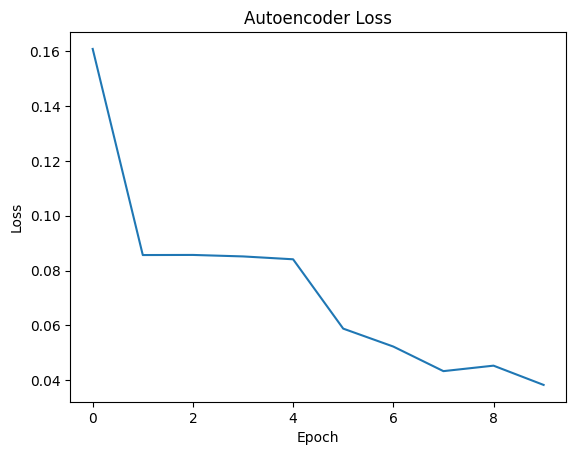

In [27]:
plot_x = range(0, 10)
plot_y = autoencoder_conv.losses

plt.plot(plot_x, plot_y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Loss')
plt.show()